In [ ]:
import pandas as pd
error_msg = '''
# need to download https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/data-preprocessing-salary'''
df = None
try:
    global df
    df = pd.read_csv("/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv")
except:
    print(error_msg)


# need to download https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/data-preprocessing-salary


In [370]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Write Your Observations Here

The 5 input columns are Age, Gender, Education Level, Job Title, and Years of Experience, while the prediction target is the Salary.

This is a (regression / classification) problem. (remove the incorrect option)

The columns ______ and ______ are numerical.

The columns ______, ______, and ______ are NOT numerical.

In [371]:
df[pd.isnull(df).any(axis=1)]
# there are two columns that contain all NaN values, and in this case everything is NaN
# if it was an actual project it would be better to know if it's data input error or a systematic error that is causing the data to
# not be recorded, to reduce bias in the modeling
# but in this case we are prototyping and have no control of the data source, so we can just remove them in the meantime

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
df = df.dropna() # drop the rows containing any nans, which happens to be the two rows containing all nans

In [373]:
from sklearn.model_selection import train_test_split
y = df[['Salary']]
X = df.drop(columns=['Salary']) # drop the salary from the inputs as the salary is the label itself
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train), len(X_val), len(X_test))

238 60 75


In [374]:
for item in X_train.columns:
    print(f"{item} has {X_train[item].nunique()} unique values.")

Age has 30 unique values.
Gender has 2 unique values.
Education Level has 3 unique values.
Job Title has 130 unique values.
Years of Experience has 27 unique values.


# Visualize and Explore Data

Usually in competition scenarios when time is tight, you might not need to actually make all these plots and visualizations below for good model performance.

But if you are developing an actual product or research project and you need to make the data analysis interpretable and convincing, these EDA (exploratory data analysis) techniques are an asset.

In [375]:
train_df_numerical = pd.concat([X_train[['Age', 'Years of Experience']], y_train], axis=1)
train_df_numerical.corr() # correlation between different variables

,Age,Years of Experience,Salary
Age,1.000000,0.979988,0.924992
Years of Experience,0.979988,1.000000,0.926781
Salary,0.924992,0.926781,1.000000


Correlation between two variables reflect the degree of linear dependence between the two variables.

For example, if X and y have a correlation coefficient of 1, this means perfect positive correlation. As X increases, y increases accordingly in a linear way. 

If they have a correlation coefficient of -1, this is perfect negative correlation. As X increases, y decreases accordingly in a linear way. 

If they have a correlation coefficient of 0, the two variables are not related in a linear way.

The concept can be visualized with the plots below.

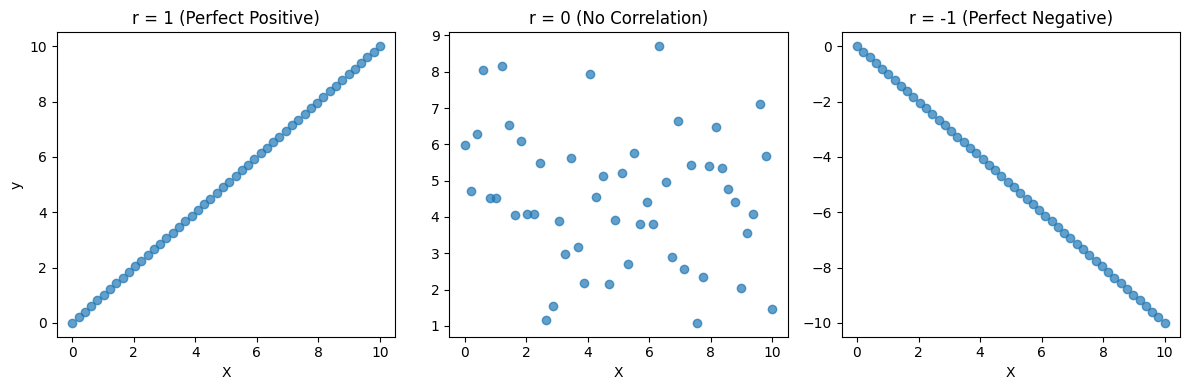

In [376]:
import matplotlib.pyplot as plt
import numpy as np

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Perfect positive correlation (r = 1)
x = np.linspace(0, 10, 50)
y1 = x
axes[0].scatter(x, y1, alpha=0.7)
axes[0].set_title('r = 1 (Perfect Positive)')
# No correlation (r = 0)
y2 = np.random.normal(5, 2, 50)
axes[1].scatter(x, y2, alpha=0.7)
axes[1].set_title('r = 0 (No Correlation)')
# Perfect negative correlation (r = -1)
y3 = -x
axes[2].scatter(x, y3, alpha=0.7)
axes[2].set_title('r = -1 (Perfect Negative)')
# Add labels
for ax in axes:
    ax.set_xlabel('X')
axes[0].set_ylabel('y')

plt.tight_layout()
plt.show()

The correlation between each input column and the target is a rough but good indicator of how important that variable is before carrying out modeling.

For example, Age (one of the input features) and Salary (the target) have a correlation coefficient of about 0.924992; Years of Experience and Salary have a correlation coefficient of about 0.926781.

They are both good indicators of the Salary in a linear sense.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


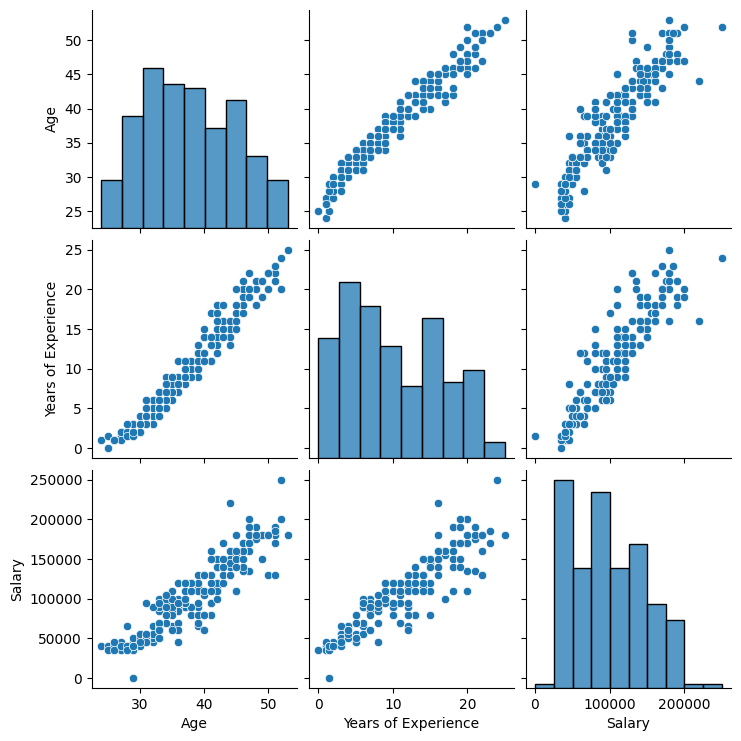

In [377]:
import seaborn as sns
sns.pairplot(train_df_numerical) # the "pairplot" visualizes the relationship between each pair of variables in the dataset

# Write Your Observations Here

In this dataset, as Age increases, Salary tends to (increase / decrease) (remove the incorrect option); as Years of Experience increases, Salary tends to (increase / decrease) (remove the incorrect option).

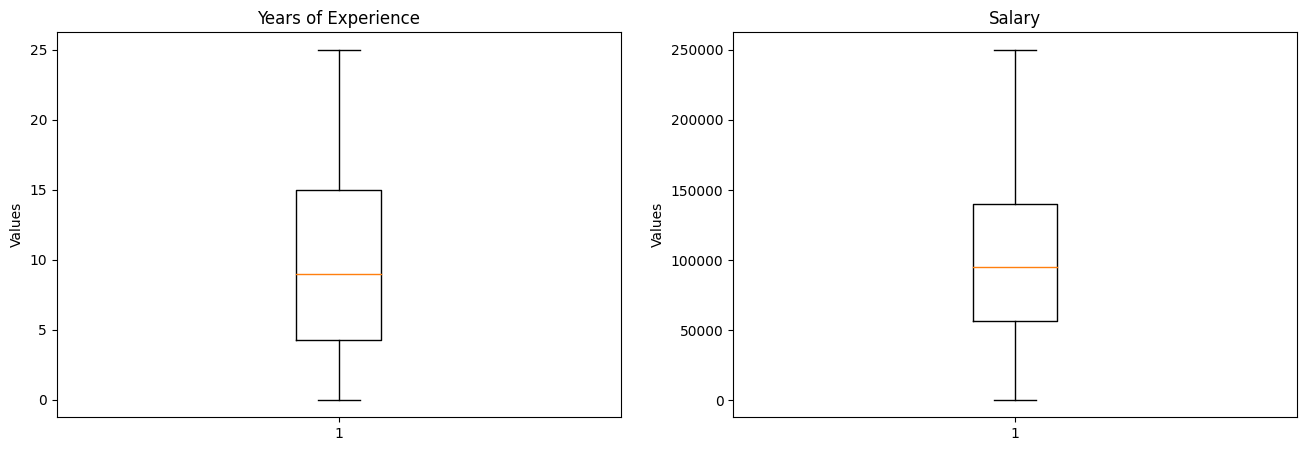

In [378]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot first boxplot
ax1.boxplot(X_train[['Years of Experience']])
ax1.set_title('Years of Experience')
ax1.set_ylabel('Values')

# Plot second boxplot
ax2.boxplot(y_train)
ax2.set_title('Salary')
ax2.set_ylabel('Values')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

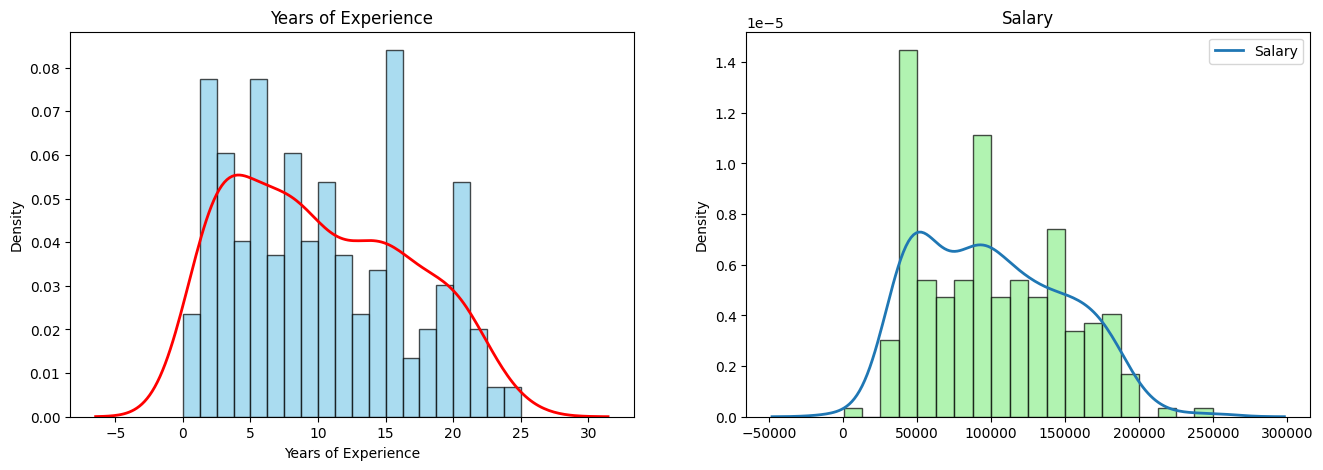

In [379]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# First subplot: Years of Experience with histogram and KDE
ax1.hist(X_train['Years of Experience'], bins=20, alpha=0.7, density=True, color='skyblue', edgecolor='black')
sns.kdeplot(X_train['Years of Experience'], ax=ax1, color='red', linewidth=2)
ax1.set_title('Years of Experience')
ax1.set_ylabel('Density')

# Second subplot: Salary with histogram and KDE
ax2.hist(y_train, bins=20, alpha=0.7, density=True, color='lightgreen', edgecolor='black')
sns.kdeplot(y_train, ax=ax2, color='red', linewidth=2)
ax2.set_title('Salary')
ax2.set_ylabel('Density')

plt.show()

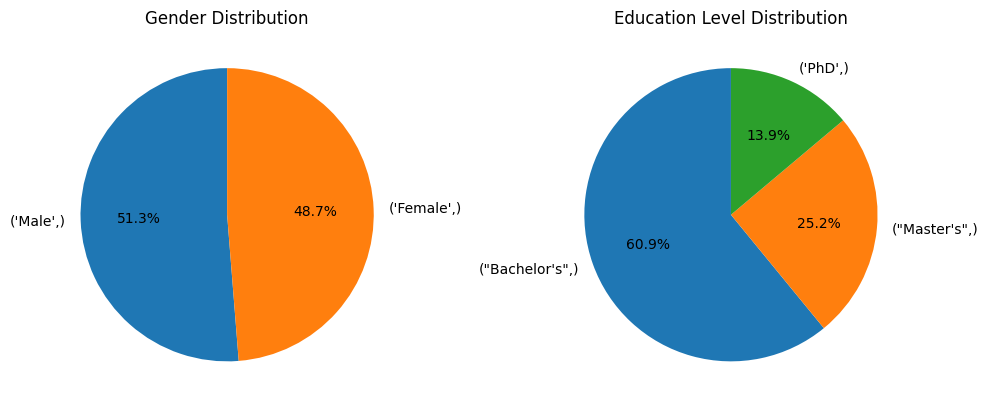

In [380]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Get the value counts for Gender
gender_counts = X_train[['Gender']].value_counts()

# First subplot: Gender distribution
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90)
ax1.set_title('Gender Distribution')

# Get the value counts for Education Level
edu_counts = X_train[['Education Level']].value_counts()

# Second subplot: Education Level distribution
ax2.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%', 
        startangle=90)
ax2.set_title('Education Level Distribution')

plt.tight_layout()
plt.show()

# Transform Non-numerical Variables

Let's try the LabelEncoder first!

In [381]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Gender_encoded'] = le.fit_transform(X_train['Gender'])
X_val['Gender_encoded'] = le.transform(X_val['Gender'])
X_test['Gender_encoded'] = le.transform(X_test['Gender'])
le = LabelEncoder()
X_train['Education_level_encoded'] = le.fit_transform(X_train['Education Level'])
X_val['Education_level_encoded'] = le.transform(X_val['Education Level'])
X_test['Education_level_encoded'] = le.transform(X_test['Education Level'])

In [382]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Gender_encoded,Education_level_encoded
285,44.0,Female,PhD,Senior Product Designer,15.0,0,2
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,1,0
51,33.0,Male,Master's,Business Intelligence Analyst,7.0,1,1
324,29.0,Female,Bachelor's,Junior Marketing Analyst,2.0,0,0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,1,0


In [383]:
feature_cols = ['Age', 'Gender_encoded', 'Education_level_encoded', 'Years of Experience']
X_train = X_train[feature_cols]
X_val = X_val[feature_cols]
X_test = X_test[feature_cols]

In [384]:
X_train.head()

,Age,Gender_encoded,Education_level_encoded,Years of Experience
285,44.0,0,2,15.0
255,44.0,1,0,14.0
51,33.0,1,1,7.0
324,29.0,0,0,2.0
351,31.0,1,0,3.0


# Let's try the different models!

In [385]:
import random
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)

In [386]:
from sklearn.linear_model import LinearRegression # import a model constructor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # metrics
### model definition and training
set_seeds(42)
reg = LinearRegression() # define the model using the constructor
reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ labelencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ labelencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ labelencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ labelencoder): {mean_absolute_error(y_val, val_preds)}")


Training MSE (w/ labelencoder): 237511916.8619351
Training MAE (w/ labelencoder): 11459.343083867992
Validation MSE (w/ labelencoder): 224370193.0503449
Validation MAE (w/ labelencoder): 11512.2965245029


In [387]:
set_seeds(42)
reg = DecisionTreeRegressor()

reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ labelencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ labelencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ labelencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ labelencoder): {mean_absolute_error(y_val, val_preds)}")

Training MSE (w/ labelencoder): 57804964.98599438
Training MAE (w/ labelencoder): 3278.851540616247
Validation MSE (w/ labelencoder): 325902777.77777773
Validation MAE (w/ labelencoder): 10638.888888888889


In [388]:
set_seeds(42)
reg = RandomForestRegressor()

reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ labelencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ labelencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ labelencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ labelencoder): {mean_absolute_error(y_val, val_preds)}")

Training MSE (w/ labelencoder): 77064299.41322847
Training MAE (w/ labelencoder): 5526.872371501048
Validation MSE (w/ labelencoder): 246658722.56363657
Validation MAE (w/ labelencoder): 10287.345073907574


/tmp/ipykernel_37/213079709.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train) # fit the model


In [389]:
reg.feature_importances_

array([0.34054232, 0.01185312, 0.03214128, 0.61546328])

In [390]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

set_seeds(42)
reg = RandomForestRegressor()

# Define scoring metrics
scoring = {
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Perform cross-validation
cv_results = cross_validate(
    reg, X_train, y_train, 
    cv=5,  # 5-fold cross-validation
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1  # use all available cores
)

# Print results
print("Cross-Validation Results:")
print(f"Training MSE: {-cv_results['train_mse'].mean():.4f} (+/- {-cv_results['train_mse'].std() * 2:.4f})")
print(f"Training MAE: {-cv_results['train_mae'].mean():.4f} (+/- {-cv_results['train_mae'].std() * 2:.4f})")
print(f"Training R²: {cv_results['train_r2'].mean():.4f} (+/- {cv_results['train_r2'].std() * 2:.4f})")
print("---")
print(f"Validation MSE: {-cv_results['test_mse'].mean():.4f} (+/- {-cv_results['test_mse'].std() * 2:.4f})")
print(f"Validation MAE: {-cv_results['test_mae'].mean():.4f} (+/- {-cv_results['test_mae'].std() * 2:.4f})")
print(f"Validation R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-Validation Results:
Training MSE: 73808078.3077 (+/- -15264864.6665)
Training MAE: 5451.9393 (+/- -647.9637)
Training R²: 0.9680 (+/- 0.0048)
---
Validation MSE: 237942830.2558 (+/- -94816897.6229)
Validation MAE: 10270.7440 (+/- -1671.8318)
Validation R²: 0.8959 (+/- 0.0212)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


<Axes: >

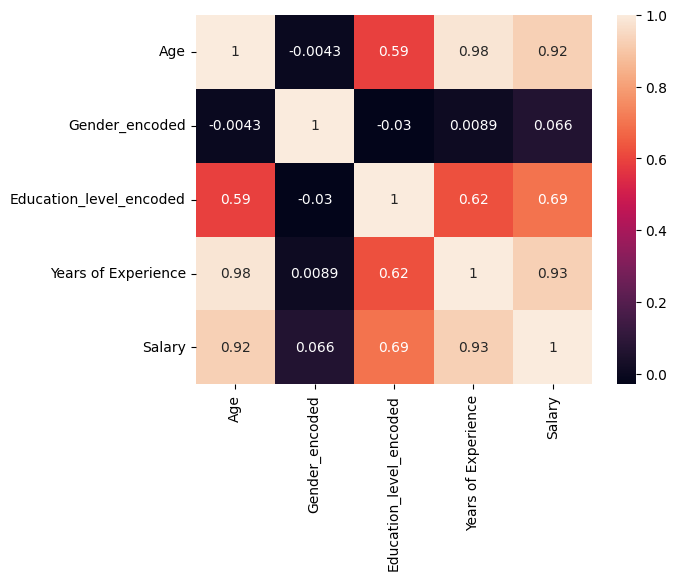

In [391]:
import seaborn as sns
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True)

# Now let's try the OneHotEncoder

In [392]:
# split the data again
from sklearn.model_selection import train_test_split
y = df[['Salary']]
X = df.drop(columns=['Salary']) # drop the salary from the inputs as the salary is the label itself
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train), len(X_val), len(X_test))

238 60 75


# Write Your Observations Here 

The data is supposed to be split randomly (so intuitively the split would be different from run to run), but it is actually acceptable to split the data again in this case. Why? (hint: refer to the random numbers handling section in the Python notes part 1)


The reason is that _________________________

In [393]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_gender_encoded = enc.fit_transform(X_train[['Gender']])
val_gender_encoded = enc.transform(X_val[['Gender']])
test_gender_encoded = enc.transform(X_test[['Gender']])
enc = OneHotEncoder()
train_edulevel_encoded = enc.fit_transform(X_train[['Education Level']])
val_edulevel_encoded = enc.transform(X_val[['Education Level']])
test_edulevel_encoded = enc.transform(X_test[['Education Level']])

In [394]:
train_gender_encoded.shape, edu_level_encoded.shape

((238, 2), (75, 3))

# Write Your Observations Here

In the one-hot encoding results,

train_gender_encoded has ___ columns (fill in the answer),

edu_level_encoded has ___ columns (fill in the answer)

This is because the Gender column has ___ unique values (fill in the answer),

and the Education Level column has ___ unique values (fill in the answer)

In [395]:
# group the encoded features and the numerical features together
feature_cols = ['Age', 'Years of Experience']
X_train = pd.concat([X_train[feature_cols].reset_index(drop=True), pd.DataFrame(train_gender_encoded.toarray()), pd.DataFrame(train_edulevel_encoded.toarray())], axis=1)
X_val = pd.concat([X_val[feature_cols].reset_index(drop=True), pd.DataFrame(val_gender_encoded.toarray()), pd.DataFrame(val_edulevel_encoded.toarray())], axis=1)
X_test = pd.concat([X_test[feature_cols].reset_index(drop=True), pd.DataFrame(test_gender_encoded.toarray()), pd.DataFrame(test_edulevel_encoded.toarray())], axis=1)


In [396]:
X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)

In [397]:
set_seeds(42)
reg = LinearRegression() # define the model using the constructor
reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ onehotencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ onehotencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ onehotencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ onehotencoder): {mean_absolute_error(y_val, val_preds)}")


Training MSE (w/ onehotencoder): 233600045.86958224
Training MAE (w/ onehotencoder): 11188.190084223426
Validation MSE (w/ onehotencoder): 206150843.0677926
Validation MAE (w/ onehotencoder): 10978.708998774668


In [398]:
set_seeds(42)
reg = DecisionTreeRegressor()

reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ onehotencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ onehotencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ onehotencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ onehotencoder): {mean_absolute_error(y_val, val_preds)}")

Training MSE (w/ onehotencoder): 57804964.98599438
Training MAE (w/ onehotencoder): 3278.851540616247
Validation MSE (w/ onehotencoder): 279027777.7777778
Validation MAE (w/ onehotencoder): 9805.555555555557


In [399]:
set_seeds(42)
reg = RandomForestRegressor()

reg.fit(X_train, y_train) # fit the model
### model evaluation
train_preds = reg.predict(X_train) # evaluate the model
val_preds = reg.predict(X_val) # evaluate the model
print(f"Training MSE (w/ onehotencoder): {mean_squared_error(y_train, train_preds)}")
print(f"Training MAE (w/ onehotencoder): {mean_absolute_error(y_train, train_preds)}")
print(f"Validation MSE (w/ onehotencoder): {mean_squared_error(y_val, val_preds)}")
print(f"Validation MAE (w/ onehotencoder): {mean_absolute_error(y_val, val_preds)}")

Training MSE (w/ onehotencoder): 77279173.35398583
Training MAE (w/ onehotencoder): 5521.513086878108
Validation MSE (w/ onehotencoder): 241822747.65662286
Validation MAE (w/ onehotencoder): 10194.529597717099


/tmp/ipykernel_37/1965943381.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train) # fit the model
